## Step 1: Business Problem

##### -> Create a predictive model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers calssify penguins in the field, instead of needing an experienced biologist

## Step 2: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\ANJALI\\Downloads\\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Step 3: Data Preprocessing

##### EDA

In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


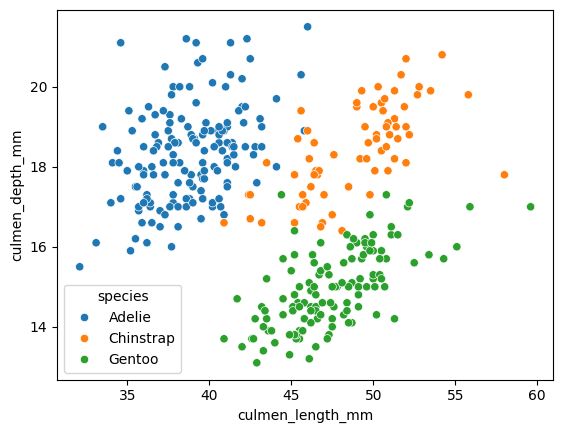

In [10]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')
plt.show()

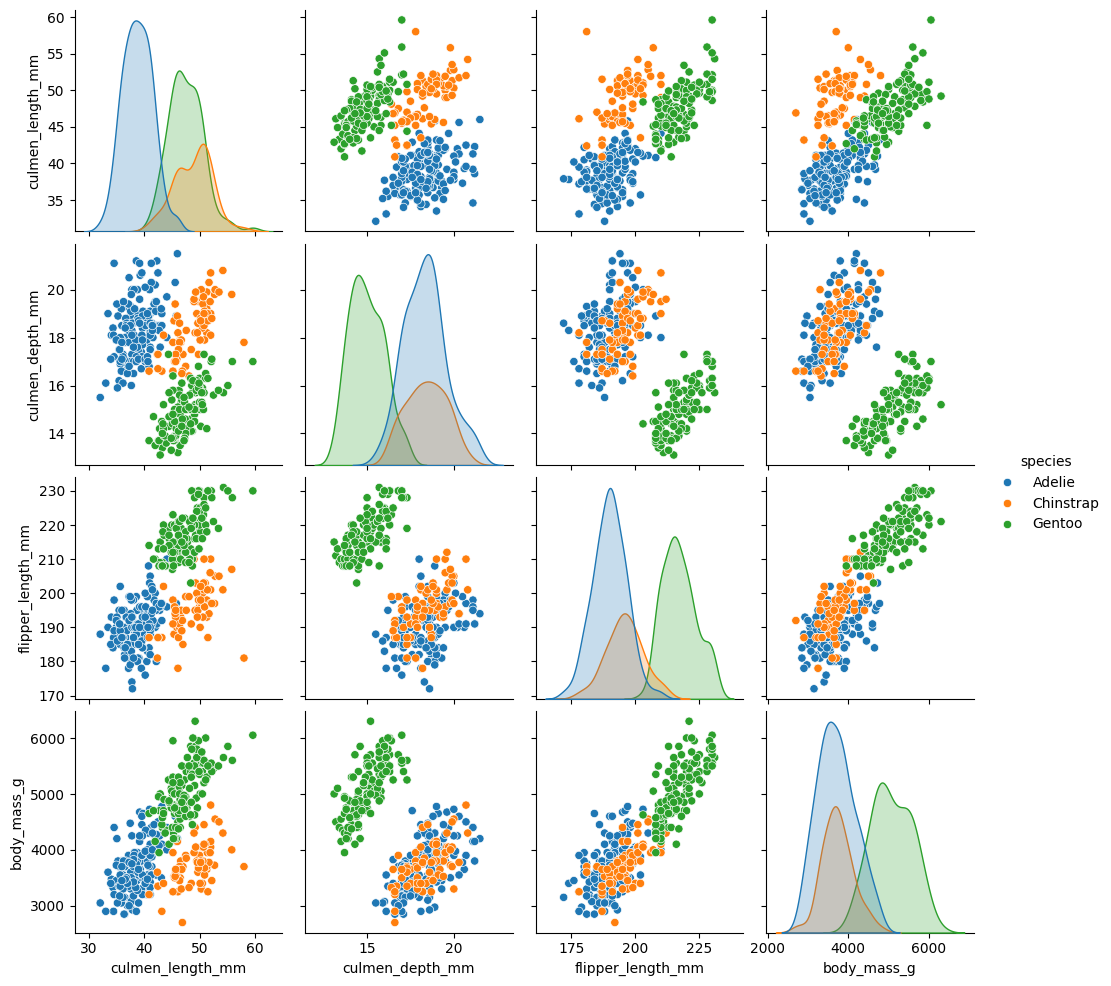

In [11]:
sns.pairplot(df,hue='species')
plt.show()

##### DATA CLEANING

In [12]:
df["sex"].replace(".", "MALE", inplace = True)

In [13]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace = True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace = True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace = True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace = True)
df["sex"].fillna(df["sex"].mode()[0], inplace = True)

##### ENCODING

In [16]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y=df['species']

##### TRAIN/TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

## Step 4: Modelling & Evaluation

Decision tree Classifier - with default parameters

In [19]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train,y_train)

#Prediction
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train accuracy: ",accuracy_score(pred_train,y_train))
print("Test accuracy: ", accuracy_score(base_pred,y_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ",cross_val_score(dt_default,X,y,cv=5).mean())

Train accuracy:  1.0
Test accuracy:  1.0
cross validation score:  0.9737425404944586


Visualise the tree

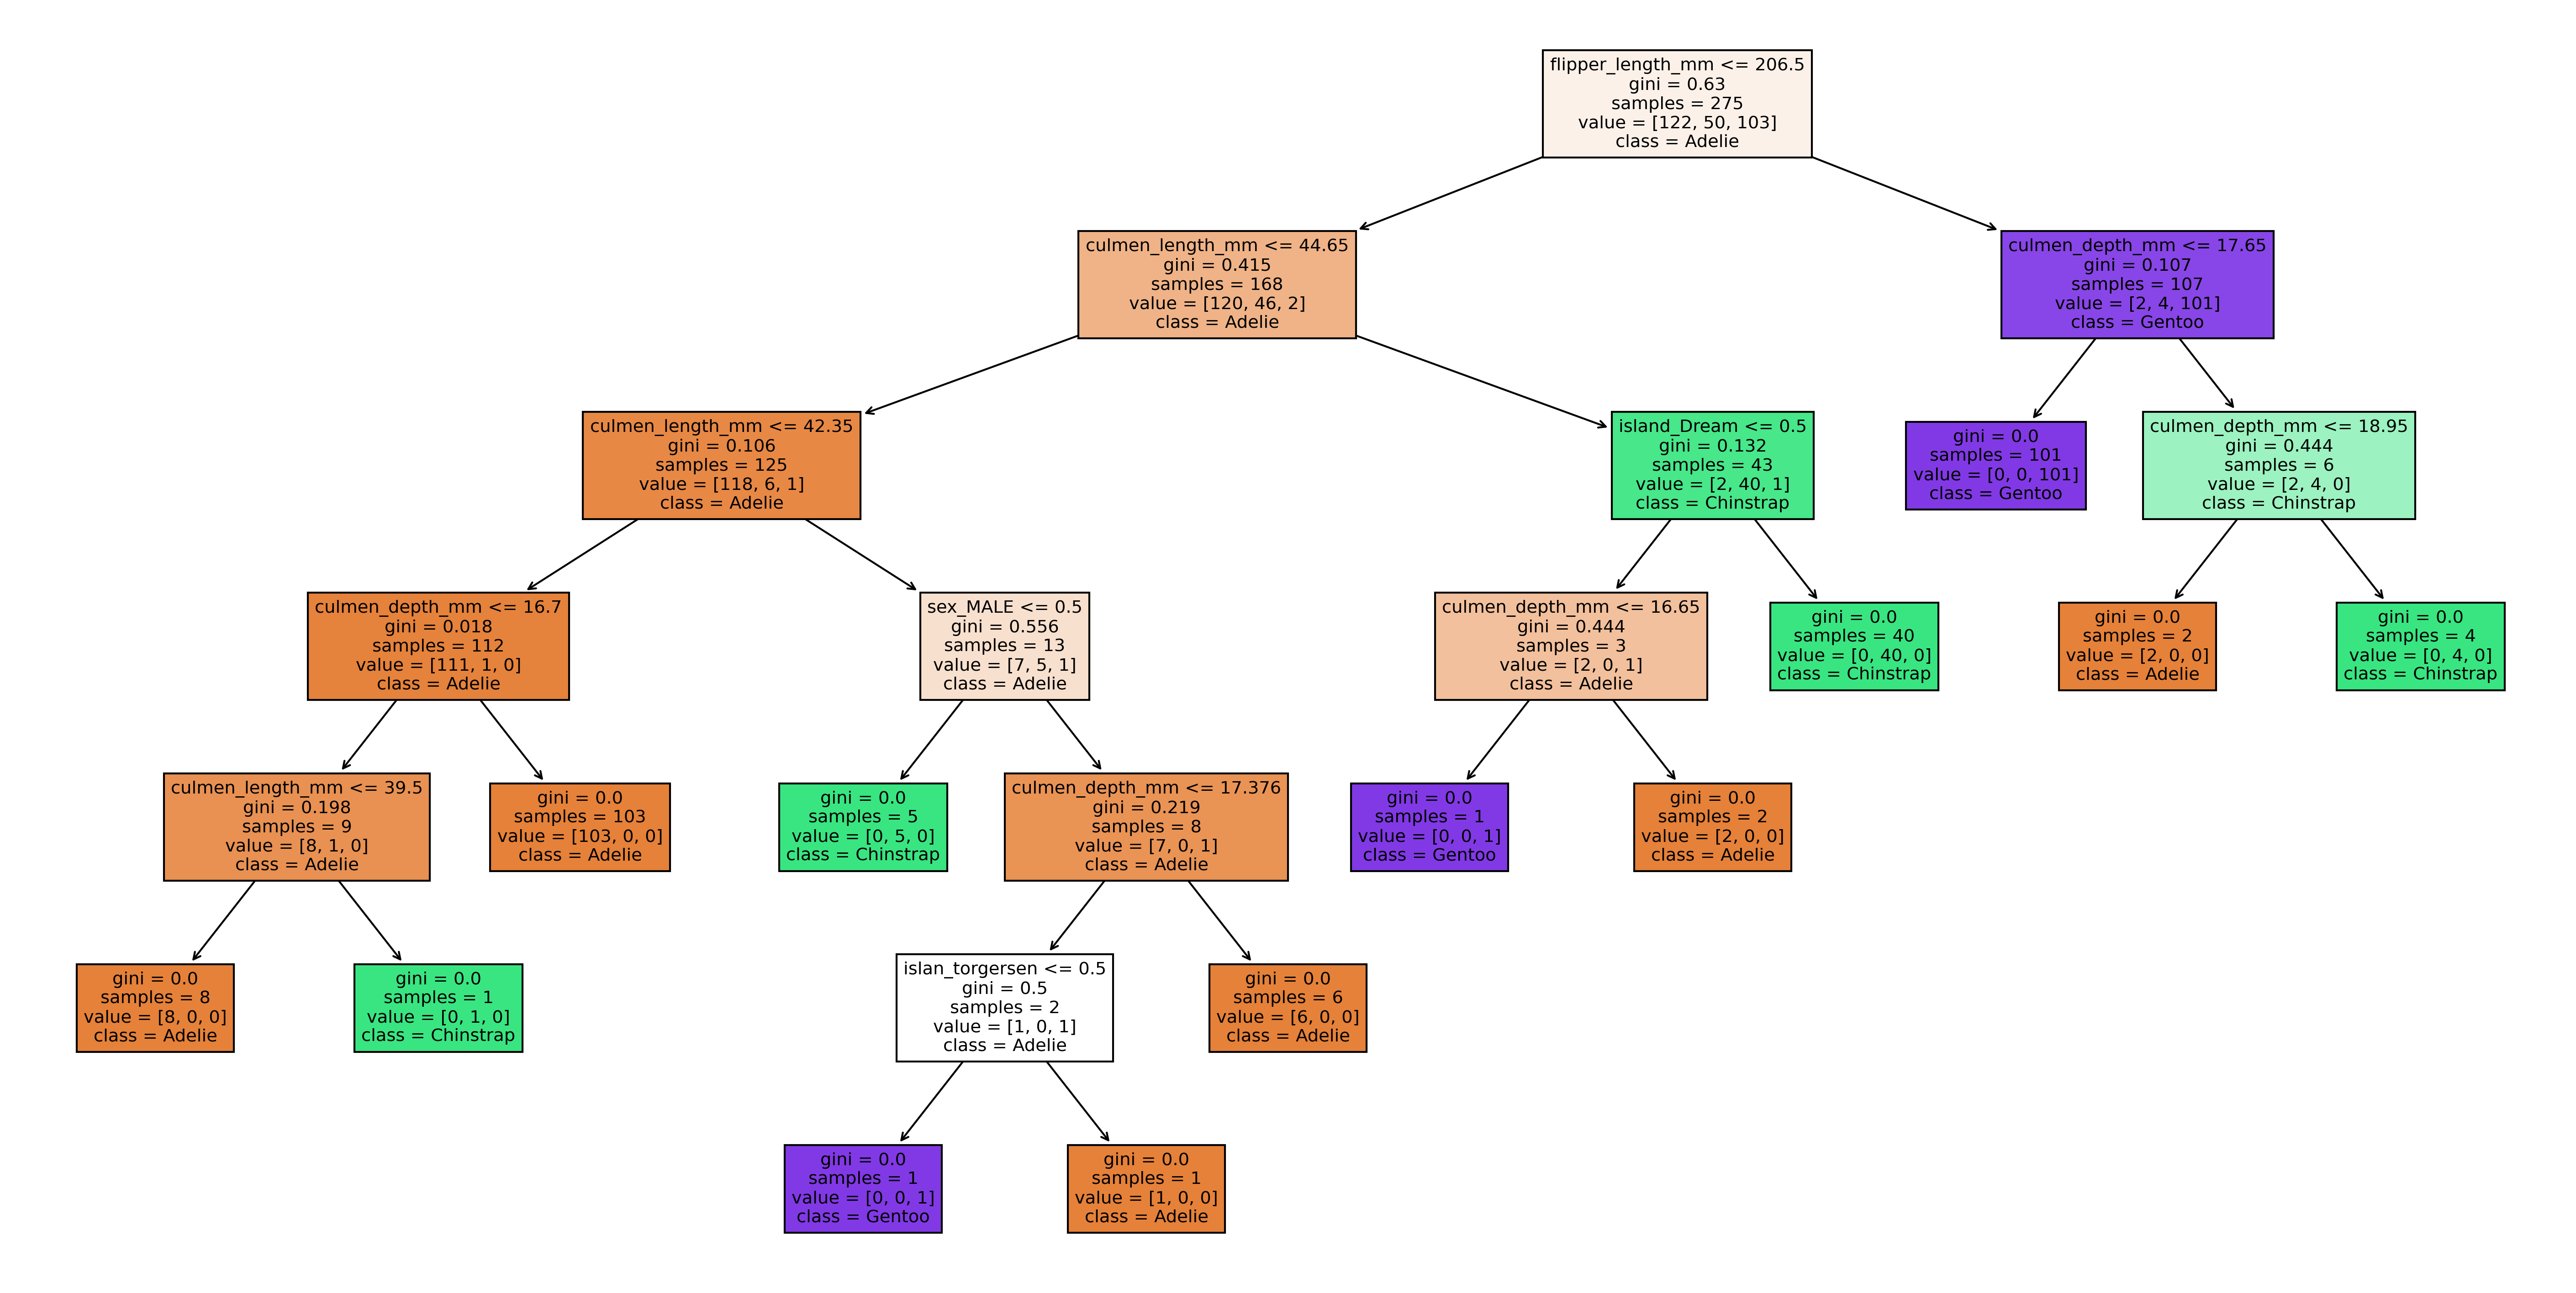

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)

plot_tree(dt_default,
          filled=True,
          feature_names=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','island_Dream','islan_torgersen', 'sex_MALE'],
          class_names=["Adelie","Chinstrap","Gentoo"])
plt.show()

HyperParameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

#model
estimator = DecisionTreeClassifier(random_state=0)

#parameters (which you want to tune and identify the best)
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":[1,2,3,4,5]}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

Importance of each feature given by this model

In [25]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.05670105, 0.5346114 , 0.00774261, 0.02520849,
       0.        , 0.03182658])

In [28]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Feature Importance'])

feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()

## Final DecisionTree Model

with best hyperparameters & with important features

In [31]:
#input with important features
X_imp = X[important_features_list]

#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X_imp,y,test_size=0.2,random_state=6)

#Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
final_dt_model.fit(X_train,y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

#Evaluation
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))
print("CV Score:",cross_val_score(final_dt_model,X_imp,y,cv=5).mean())

Train accuracy: 0.9963636363636363
Test accuracy: 1.0
CV Score: 0.9737851662404091


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)